# 2-5 あれもこれも実は"グラフ"

## グラフとは

- 頂点(vertex, node)と辺(edge)からなる．
- 頂点集合が$V$，辺集合が$E$であるグラフを$G=(V,E)$ と表す
- 2点$u,v$を結ぶ辺を$e=(u,v)$ と表す

### グラフの種類

1. 辺に向きがあるか
- 向きがない -> 無向グラフ
- 向きがある -> 有向グラフ

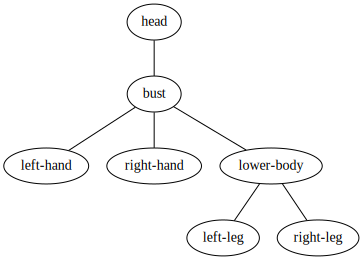

In [1]:
# 無向グラフ

import graphviz

dot = graphviz.Graph()
dot.edge('head', 'bust')
dot.edge('bust', 'left-hand')
dot.edge('bust', 'right-hand')
dot.edge('bust', 'lower-body')
dot.edge('lower-body', 'left-leg')
dot.edge('lower-body', 'right-leg')

dot

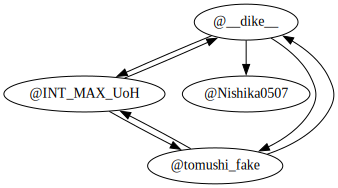

In [2]:
# 有向グラフ

import graphviz

dot = graphviz.Digraph()
dot.edge('@__dike__', '@INT_MAX_UoH')
dot.edge('@INT_MAX_UoH', '@__dike__')
dot.edge('@__dike__', '@Nishika0507')
dot.edge('@__dike__', '@tomushi_fake')
dot.edge('@tomushi_fake', '@__dike__')
dot.edge('@INT_MAX_UoH', '@tomushi_fake')
dot.edge('@tomushi_fake', '@INT_MAX_UoH')


dot

2. 辺に重みがあるか
- 重みがある -> 重み付きグラフ
- 重みがない -> 重み無しグラフ

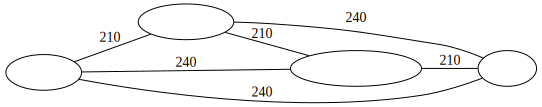

In [3]:
# 重み付きグラフ

import graphviz

dot = graphviz.Graph()
dot.attr(rankdir='LR')
dot.edge('伊川谷', '学園都市', label='210')
dot.edge('伊川谷', '総合運動公園', label='240')
dot.edge('伊川谷', '名谷', label='240')
dot.edge('学園都市', '総合運動公園', label='210')
dot.edge('総合運動公園', '名谷', label='210')
dot.edge('学園都市', '名谷', label='240')

dot

### 無向グラフの用語

- 隣接している: 2つの頂点間に辺がある
- パス: 隣接している頂点の列
- 次数: 頂点に繋がっている辺の数
- 木: 閉路を持たない連結グラフ（辺の数 = 頂点数-1）
  - 森: 木の集まり（連結とは限らない，閉路をもたない無向グラフ）

### 有向グラフの用語

有向グラフの頂点$v$に対して，$v$から出ていく辺の集合を$\delta_+(v)$，入ってくる辺の集合を$\delta_-(v)$と表記する．
- 出自数(indegree): $|\delta_+(v)|$
- 入次数(outdegree): $|\delta_-(v)|$

- DAG(**D**irected **A**cyclic **G**raph): 閉路を持たない有向グラフ  
※ acyclicの発音は[eisáiklik]

catupper, 2020「DAGはDP」

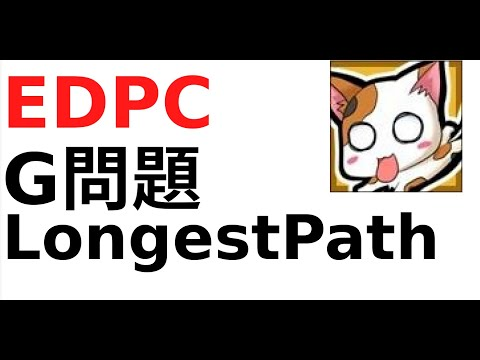

In [4]:
import IPython.display

IPython.display.YouTubeVideo(id='U5geMnL9gGU', start=250)

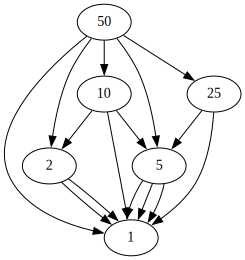

In [5]:
# DAG

import graphviz

def rec(n: int) -> None:
    for i in range(1, n):
        if n % i == 0:
            dot.edge(str(n), str(i))
            rec(i)
    return dot

dot = graphviz.Digraph()
rec(50)

- トポロジカル順序: どのノードもその出力辺の先のノードの前に来るような順序
  - 要するに，一列に並べた時に後ろ向きの辺が存在しない並べ方
- トポロジカルソート: トポロジカル順序を求めること

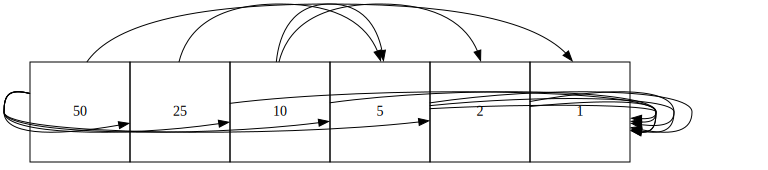

In [6]:
# トポロジカル順序

import graphviz

def rec(n: int) -> None:
    for i in range(1, n):
        if n % i == 0:
            dot.edge(f'struct:{n}', f'struct:{i}')
            rec(i)
    return dot

dot = graphviz.Digraph(node_attr={'shape': 'plaintext'})
dot.node('struct', f'''\
<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
        <TR>{''.join(f'<TD width="100" height="100" port="{e}">{e}</TD>' for e in (50, 25, 10, 5, 2, 1))}</TR>
    </TABLE>
>''')
rec(50)

## グラフの表現

### 隣接行列

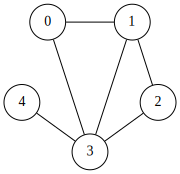

i ＼ j,0,1,2,3,4
0,0,1,0,1,0
1,1,0,1,1,0
2,0,1,0,1,0
3,1,1,1,0,1
4,0,0,0,1,0


In [7]:
# 無向グラフ

import pandas as pd
import graphviz

mat = pd.DataFrame([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 1, 0, 1],
    [0, 0, 0, 1, 0]
])
mat.columns.name = 'i ＼ j'

dot = graphviz.Graph(engine='neato')
dot.node_attr['shape'] = 'circle'
dot.node('0', pos='-0.59,0.81!')
dot.node('1', pos='0.59,0.81!')
dot.node('2', pos='0.95,-0.31!')
dot.node('3', pos='0.00,-1.00!')
dot.node('4', pos='-0.95,-0.31!')

for i in range(5):
    for j in range(i, 5):
        if mat.iloc[i][j]:
            dot.edge(str(i), str(j), )
display(dot)
display(mat)

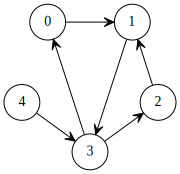

i ＼ j,0,1,2,3,4
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,1,0,1,0,0
4,0,0,0,1,0


In [8]:
# 有向グラフ

import pandas as pd
import graphviz

mat = pd.DataFrame([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0]
])
mat.columns.name = 'i ＼ j'

dot = graphviz.Digraph(engine='neato')
dot.node_attr['shape'] = 'circle'
dot.edge_attr['arrowhead'] = 'open'
dot.node('0', pos='-0.59,0.81!')
dot.node('1', pos='0.59,0.81!')
dot.node('2', pos='0.95,-0.31!')
dot.node('3', pos='0.00,-1.00!')
dot.node('4', pos='-0.95,-0.31!')

for i in range(5):
    for j in range(5):
        if mat.iloc[i][j]:
            dot.edge(str(i), str(j), )
display(dot)
display(mat)

- 利点
  - 二点間に辺があるか否かを定数時間で判定できる
- 欠点
  - 領域計算量が $O(|V|^2)$
  - (多重辺を表現できない)

TIPS: 重み付きグラフの場合は，辺が存在しないことを無限大として表現することもある．

### 隣接リスト

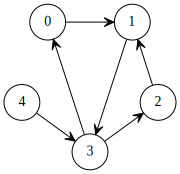

,隣接する頂点のリスト
頂点,
0,[1]
1,[3]
2,[1]
3,"[0, 2]"
4,[3]


In [9]:
# 隣接リスト

import pandas as pd
import graphviz

mat = pd.DataFrame([
    [[1]],
    [[3]],
    [[1]],
    [[0, 2]],
    [[3]]
], dtype=object, columns=['隣接する頂点のリスト'])
mat.index.name = '頂点'

dot = graphviz.Digraph(engine='neato')
dot.node_attr['shape'] = 'circle'
dot.edge_attr['arrowhead'] = 'open'
dot.node('0', pos='-0.59,0.81!')
dot.node('1', pos='0.59,0.81!')
dot.node('2', pos='0.95,-0.31!')
dot.node('3', pos='0.00,-1.00!')
dot.node('4', pos='-0.95,-0.31!')

for init, terms in mat.iterrows():
    for term in next(iter(terms.values)):
        dot.edge(str(init), str(term))
display(dot)
display(mat)

- 利点
  - 領域計算量 $O(|V|+|E|)$
- 欠点
  - 管理が複雑
    - 2点間に辺があるかの探索に$O(|V|)$かかる

## グラフの探索

POINT
- グラフが連結でない場合も有り得る
  - (20行目) 色の塗られていない全ての頂点に対してdfsを実行
- 全ての辺と頂点を一度ずつ見ているので計算量は $O(|V|+|E|)$

bipartiteの発音は[bʌɪˈpɑːtʌɪt]

In [10]:
# 二部グラフ判定

from typing import Literal

graph: dict[int, list[int]]  # 隣接リスト表現
V: int

color: list[int]  # 1 or -1, 0は未着色

def dfs(u: int, c: Literal[1, -1]) -> None:
    color[u] = c
    for v in graph[u]:
        if color[v] == c:
            return False
        if color[v] == 0 and not dfs(v, -color[u]):
            return False
    return True

def solve() -> None:
    if all(dfs(v, 1) for v in range(V) if color[v] == 0):
        print('Yes')
    else:
        print('No')


練習問題

- [ABC282 D - Make Bipartite2](https://atcoder.jp/contests/abc282/tasks/abc282_d)

## 最短路問題

- 最短路とは，2頂点を与えられたときに，その頂点を端点とするパスのうち，通る辺のコストを最小にするもの
    - 重み無しグラフの場合は，辺の重みを1として扱う

In [11]:
# 最短路の例

import ipywidgets
import graphviz

with open('assets/2-5/01_shortest_path.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=3, min=1), Output()), _dom_classes=('widget-…

最短路問題の分類
- 2頂点対最短経路問題
  - 特定の2つのノード間の最短経路問題．一般的に単一始点最短経路問題のアルゴリズムを使用する
- 単一始点最短経路問題 (SSSP：**S**ingle **S**ource **S**hortest **P**ath)
  - 特定の1つのノードから他の全ノードとの間の最短経路問題
- 全点対最短経路問題 (APSP : **A**ll **P**air **S**hortest **P**ath)
  - グラフ内のあらゆる2ノードの組み合わせについての最短経路問題


### 単一始点最短路問題１（ベルマンフォード法）

$$
\begin{aligned}
    d[i] &:= 始点sから頂点iへの最短距離\\
    d[i] &= min\{d[j] + (jからiへの辺のコスト)\space|\space e=(j,i) \in E\}
\end{aligned}
$$

- グラフがDAGであれば，上式を用いて再帰的に解くことが可能
- そうでない場合は，初期値$d[s]=0, d[i]=\infty$を与え，繰り返し運用することで最短経路を求める事が出来る
  - 但し，負閉路が存在しない場合に限る

In [12]:
# ベルマンフォード法

import dataclasses

INF = float('inf')

@dataclasses.dataclass
class Edge:
    from_: int
    to_: int
    cost_: int

V: int; E: int
es: list[Edge]  # 辺集合
d: list[int]


def bellman_ford(s: int) -> None:
    d[:] = [INF] * V
    d[s] = 0
    is_updated: bool = True
    while is_updated:
        is_updated = False
        for e in es:
            if d[e.from_] + e.cost_ < d[e.to_]:
                d[e.to_] = d[e.from_] + e.cost_
                is_updated = True


In [13]:
import ipywidgets
import graphviz

with open('assets/2-5/02-1_bellman_ford.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=62, min=1), Output()), _dom_classes=('widget…

### ベルマンフォード法の計算量

- グラフに$s$から到達可能な負閉路が存在しなければ，最短路は同じ頂点を通らないので，メインループは高々$|V|-1$回しか実行されない
- メインループ内での計算量は$O(|E|)$より，全体での計算量は$O(|V|\times|E|)$

また，全てのiについて$d[i]=0$とすると，全ての負閉路を検出できる

In [14]:
# ベルマンフォード法（負閉路の検出）

import dataclasses

INF = float('inf')

@dataclasses.dataclass
class Edge:
    from_: int
    to_: int
    cost_: int

V: int; E: int
es: list[Edge]  # 辺集合
d: list[int]


def bellman_ford_(s: int) -> bool:
    d[:] = [0] * V
    for _ in range(V - 1):
        for e in es:
            if d[e.from_] + e.cost_ < d[e.to_]:
                d[e.to_] = d[e.from_] + e.cost_
    for e in es:
        if d[e.from_] + e.cost_ < d[e.to_]:
            return True
    return False

In [15]:
import ipywidgets
import graphviz

with open('assets/2-5/02-2_bellman_ford_negative_cycle.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=24, min=1), Output()), _dom_classes=('widget…

### 単一始点最短路問題２（ダイクストラ法）

**負辺がない場合を仮定**

ベルマンフォード法
1. $d[i]$が最短距離でない場合，$d[j]=d[i]+w(i,j)$の更新が無意味
2. $d[i]$が変化していない場合でも，頂点$i$から出ている辺を毎回見ている

これらの問題を修正したものがダイクストラ法

1. 最短距離が確定した頂点と隣接している頂点を更新する
2. 1.で使った「最短距離が確定した頂点」はもう使わない

In [16]:
# ダイクストラ法（ナイーブな実装）

cost: list[list[int]]
d: list[int]
used: list[bool]
V: int

def dijkstra_(s: int) -> None:
    ...


隣接行列を用いると各頂点の更新に$O(|V|)$，隣接頂点の探索に$O(|V|)$かかるため，全体として$O(|V|^2)$になる．

各頂点の仮の最短距離をヒープで管理することで，計算量は$O(|E|log|V|)$になる

In [17]:
# ダイクストラ法（ヒープ実装）

import dataclasses
import heapq

@dataclasses.dataclass
class Edge:
    to: int
    cost: int

V: int
graph: list[list[Edge]]
d: list[int]

def dijkstra(s: int) -> None:
    d[:] = [INF] * V
    d[s] = 0

    # que := [(min_dist, node_num), ...]
    que: list[tuple[int, int]] = [(0, s)]

    while que:
        dist, now = heapq.heappop(que)
        if d[now] < dist:
            continue
        for e in graph[now]:
            if d[e.to] > d[now] + e.cost:
                d[e.to] = d[now] + e.cost
                heapq.heappush(que, (d[e.to], e.to))


In [18]:
import ipywidgets
import graphviz

with open('assets/2-5/03_dijkstra.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=21, min=1), Output()), _dom_classes=('widget…

#### 補足：負辺が存在する場合

途中で$d(v)$の暫定値の最適値が最小となった場合でも，後に負辺が発見されることにより，より良い路が見つかりうるため最短路長が確定しない．

#### 補足：ダイクストラ法の正当性

<!-- - 最短路の性質
  - 最適性の原理
    - $s$から$t$への最短路を$P$とし，$P$上の任意の頂点$v$に対して，$P$を$v$の前後で2つの路$P_1,P_2$に分解するとき，$P_1$は$s$から$v$への最短路，$P_2$は$v$から$t$への最短路となっている
    - **証明:** $P_1$より最短の路な$s$から$v$の路$P_1'$が存在すると，$P_1'P_2$が最短路となり，これは$P$の最適性に矛盾する
  - 隣接する頂点への最短路長
    - $s$から頂点$v$への最短路長を$d(v)$で表すとき，頂点$v$と$v$に隣接する頂点$v'$について，$d(v')\le d(v)+w(v,v')$が成り立つ
    - 頂点$v'$が複数の頂点$v$に隣接しているとき，$d(v')=\min\{d(v)+w(v,v')\space|\space (v,v')\in E\}$ -->



  1. $d(v)$の値が確定した頂点集合を$S$とすると，$s\in S, u_i',u_j'\in$ (Sに隣接した頂点集合) について，  
「$u_i'$に対する暫定値$d(u_i')$が最短路長でないならば，$d(u_j')\le s$から$u_i'$ への最短路長 $<d(u_i')$を満たす$u_j'$が存在する」が成り立つ
     <!-- - 補足）$d(u_i')$が最短路長でない場合，他に最短路長$d(u_j')$が存在し，その$d_j'$は$d(u_j')\le d(u_i')+w(u_i',u_j')$（最短路の性質）を満たす -->
  2. 上命題の対偶「$d(u_j')<d(u_i')$が存在しないならば，$u_i'$に対する暫定値$d(u_i')$が最短路長」を利用し$S$の更新を行っていく


### 全点対最短路問題（ワーシャル・フロイド法）

$$
\begin{aligned}
    d[k][i][j] &:= 頂点0-kと，i，jのみを使う場合の，iからjへの最短路\\
    d[k][i][j] &= \min(d[k-1][i][j], d[k-1][i][k]+d[k-1][k][j])
\end{aligned}
$$

- 始点，終点，経由点を全探索する
- 負閉路がない場合に動作する

In [19]:
# ワーシャル・フロイド法

N: int
d: list[list[int]]

def floyd_warshall():
    for k in range(N):
        for u in range(N):
            for v in range(N):
                d[u][v] = min(d[u][v], d[u][k] + d[k][v])


グラフの隣接行列表現をそのまま利用する．`k`, `u`, `v` の順番でループを回す必要がある事に注意．

In [20]:
import ipywidgets
import IPython.display
import graphviz

with open('assets/2-5/04_floyd_warshall.txt') as f, open('assets/2-5/04_floyd_warshall_graph.txt') as f2:
    films = f.read().split('\n\n')
    films2 = f2.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(IPython.display.HTML(films[frame - 1]))
    display(graphviz.Source(films2[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=65, min=1), Output()), _dom_classes=('widget…

### ワーシャルフロイド法の計算量

$O(|V|^3)$

練習問題
- [ABC079 D - Wall](https://atcoder.jp/contests/abc079/tasks/abc079_d)
- [ABC012 D - バスと避けられない運命](https://atcoder.jp/contests/abc012/tasks/abc012_4)
- [ABC208 D - Shortest Path Queries 2](https://atcoder.jp/contests/abc208/tasks/abc208_d)

参考
- [素人によるワーシャルフロイド法](https://qiita.com/okaryo/items/8e6cd73f8a676b7a5d75)

### 経路復元

遷移があった場合，直前の頂点を`prev[j]`として記憶しておく

In [21]:
# ダイクストラ法（経路復元）

import dataclasses
import heapq

@dataclasses.dataclass
class Edge:
    to: int
    cost: int

V: int
graph: list[list[Edge]]
d: list[int]
prev: list[int]

def dijkstra(s: int) -> None:
    d[:] = [INF] * V
    d[s] = 0
    prev[:] = [-1] * V

    que: list[tuple[int, int]] = [(0, s)]

    while que:
        dist, now = heapq.heappop(que)
        if d[now] < dist:
            continue
        for e in graph[now]:
            if d[e.to] > d[now] + e.cost:
                d[e.to] = d[now] + e.cost
                prev[e.to] = now
                heapq.heappush(que, (d[e.to], e.to))


## 最小全域木

- 全域木(Spanning Tree): 無向グラフが与えられた時に，その部分グラフで任意の2頂点を連結にするような木
- 最小全域木(MST: **M**inimum **S**panning **T**ree): 使われる辺のコストを最小にする全域木

以下では連結なグラフを仮定する．

In [22]:
import ipywidgets
import graphviz

with open('assets/2-5/05_minimum_spanning_tree.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=5, min=1), Output()), _dom_classes=('widget-…

### 最小全域木問題１（プリム法）

ある頂点からはじめて少しずつ辺を追加していく方法

In [23]:
# プリム法

import heapq

class Edge:

    def __init__(self, to: int, cost: int) -> None:
        self.to: int = to
        self.cost: int = cost

    def __lt__(self, other: 'Edge') -> bool:
        return self.cost < other.cost


graph: list[list[Edge]]
V: int

def prim(s: int = 0) -> int:

    que: list = []
    for e in graph[s]:
        heapq.heappush(que, e)
    used = {s}

    res: int = 0
    while que:
        min_e: Edge = heapq.heappop(que)
        if min_e.to in used:
            continue
        used.add(min_e.to)
        res += min_e.cost
        for e in graph[min_e.to]:
            if e.to in used:
                continue
            heapq.heappush(que, e)
    return res


In [24]:
import ipywidgets
import graphviz

with open('assets/2-5/06_prim.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=18, min=1), Output()), _dom_classes=('widget…

### 最小全域木問題２（クラスカル法）

辺をコストの小さい順に見ていき，閉路が出来ない限り追加していく方法．

閉路が出来るか否かの判定にはUnionFindを利用する．
- 追加したい辺が既に同じ連結成分に属すると，追加した場合閉路が出来る

In [25]:
# クラスカル法

from atcoder.dsu import DSU

class Edge:

    def __init__(self, u: int, v: int, cost: int) -> None:
        self.u: int = u
        self.v: int = v
        self.cost: int = cost

    def __lt__(self, other: 'Edge') -> bool:
        return self.cost < other.cost


es: list[Edge]
V: int; E: int

def kruskal() -> int:

    dsu: DSU = DSU(V)
    res: int = 0
    for e in sorted(es):
        if not dsu.same(e.u, e.v):
            dsu.merge(e.u, e.v)
            res += e.cost
    return res


In [26]:
import ipywidgets
import graphviz

with open('assets/2-5/07_kruskal.txt') as f:
    films = f.read().split('\n\n')

@ipywidgets.interact(frame=ipywidgets.IntSlider(min=1, max=len(films)))
def project(frame):
    display(graphviz.Source(films[frame - 1], engine='neato'))

interactive(children=(IntSlider(value=1, description='frame', max=20, min=1), Output()), _dom_classes=('widget…

### プリム法とクラスカル法の正当性

「重み付き無向グラフ $G=(V,E,w)$ における任意のカット $(S,V\setminus S)$ のうち，最小の重みを持つ任意の辺 $e^\star$ は $G$ の最小全域木 $T^\star$ に含まれる」

証明：  
$T^\star$は$e^\star$を含まないと仮定する．このとき，$T^\star$に$e^\star$を追加したグラフは閉路$C$を含む．カット$(S,V\setminus S)$は$e^\star$以外に$C$の辺を最低一つ含み，それを$e'$とする．$T^\star$に$e^\star$を追加して$e'$を除いたグラフも$G$の全域木となり，それを$T'$とする．$w(e^\star)<w(e')$より，$T'$は$T^\star$ よりも重みが小さいが，これは仮定に矛盾する．よって$T^\star$に$e^\star$が含まれることが示された．

練習問題
- [ABC218 E - Destruction](https://atcoder.jp/contests/abc218/tasks/abc218_e)
- [ABC282 E - Choose Two and Eat One](https://atcoder.jp/contests/abc282/tasks/abc282_e)

## 応用問題

In [27]:
# Roadblocks

In [28]:
# Conscription

In [29]:
# Layout

## 付録

In [30]:
raise

RuntimeError: No active exception to reraise

### 最短路

In [ ]:
import graphviz

with open('assets/2-5/01_shortest_path.txt', 'w') as f:

    dot = graphviz.Graph(engine='neato')
    dot.attr(rankdir='LR')
    dot.node('A', pos='0,0!')
    dot.node('B', pos='1,0.1!')
    dot.node('C', pos='0,-1!')
    dot.node('D', pos='1.2,-1.1!')
    dot.node('E', pos='2,0.1!')
    dot.node('F', pos='2.3,-0.9!')
    dot.node('G', pos='3.2,-0.2!')
    dot.edge('A', 'B', label='2')
    dot.edge('A', 'C', label='5')
    dot.edge('B', 'C', label='4')
    dot.edge('B', 'D', label='6')
    dot.edge('B', 'E', label='10')
    dot.edge('C', 'D', label='2')
    dot.edge('D', 'F', label='1')
    dot.edge('E', 'F', label='3')
    dot.edge('E', 'G', label='5')
    dot.edge('F', 'G', label='9')

    f.write(str(dot))
    f.write('\n')

    dot = graphviz.Graph(engine='neato')
    dot.attr(rankdir='LR')
    dot.node('A', pos='0,0!')
    dot.node('B', pos='1,0.1!')
    dot.node('C', pos='0,-1!')
    dot.node('D', pos='1.2,-1.1!')
    dot.node('E', pos='2,0.1!')
    dot.node('F', pos='2.3,-0.9!')
    dot.node('G', pos='3.2,-0.2!')
    dot.edge('A', 'B', label='2')
    dot.edge('A', 'C', label='5', color='red', style='bold')
    dot.edge('B', 'C', label='4')
    dot.edge('B', 'D', label='6')
    dot.edge('B', 'E', label='10')
    dot.edge('C', 'D', label='2', color='red', style='bold')
    dot.edge('D', 'F', label='1', color='red', style='bold')
    dot.edge('E', 'F', label='3', color='red', style='bold')
    dot.edge('E', 'G', label='5', color='red', style='bold')
    dot.edge('F', 'G', label='9')

    f.write(str(dot))
    f.write('\n')

### ベルマンフォード法

In [ ]:
import dataclasses
import graphviz

INF = float('inf')

@dataclasses.dataclass
class Edge:
    from_: int
    to_: int
    cost_: int

def _bellman_ford_(s: int) -> None:
    d[0] = 0
    d[1:] = [INF] * (V - 1)
    __film = [(d.copy(), 0, 0)]
    is_updated: bool = True
    while is_updated:
        is_updated = False
        for e in es:
            if d[e.from_] + e.cost_ < d[e.to_]:
                d[e.to_] = d[e.from_] + e.cost_
                is_updated = True
            __film.append((d.copy(), e.from_, e.to_))
    return __film

V = 7; E = 20
es = [
    Edge(from_=0, to_=1, cost_=2),
    Edge(from_=0, to_=2, cost_=5),
    Edge(from_=1, to_=0, cost_=2),
    Edge(from_=1, to_=2, cost_=4),
    Edge(from_=1, to_=3, cost_=6),
    Edge(from_=1, to_=4, cost_=10),
    Edge(from_=2, to_=0, cost_=5),
    Edge(from_=2, to_=1, cost_=4),
    Edge(from_=2, to_=3, cost_=2),
    Edge(from_=3, to_=1, cost_=6),
    Edge(from_=3, to_=2, cost_=2),
    Edge(from_=3, to_=5, cost_=1),
    Edge(from_=4, to_=1, cost_=10),
    Edge(from_=4, to_=5, cost_=3),
    Edge(from_=4, to_=6, cost_=5),
    Edge(from_=5, to_=3, cost_=2),
    Edge(from_=5, to_=4, cost_=3),
    Edge(from_=5, to_=6, cost_=9),
    Edge(from_=6, to_=4, cost_=5),
    Edge(from_=6, to_=5, cost_=9),
]
d = [0] * V

__film = _bellman_ford_(0)

with open('assets/2-5/02-1_bellman_ford.txt', 'w') as file:
    for i in range(len(__film)):
        f = __film[i]
        dot = graphviz.Digraph(strict=True, engine='neato')
        dot.attr(rankdir='LR')
        dot.node_attr['width'] = '1'
        dot.node_attr['height'] = '1'
        dot.node_attr['shape'] = 'circle'
        dot.node('A', pos='0,0!')
        dot.node('B', pos='2,0.1!')
        dot.node('C', pos='0,-2!')
        dot.node('D', pos='2.2,-2.1!')
        dot.node('E', pos='4,0.1!')
        dot.node('F', pos='4.5,-1.8!')
        dot.node('G', pos='6.2,-0.2!')
        used = set()
        if i != 0:
            dot.edge(chr(f[1] + 65), chr(f[2] + 65), color='red', label=str(next(e.cost_ for e in es if e.from_ == f[1] and e.to_ == f[2])))
            used.add((f[1], f[2]))
            dot.node(chr(f[1] + 65), label=f'{chr(f[1] + 65)}(from)\nd={f[0][f[1]]}\n', width='1.1', height='1.1', color='red')
            dot.node(chr(f[2] + 65), label=f'{chr(f[2] + 65)}(to)\nd={f[0][f[2]]}\n', width='1.1', height='1.1', color='red')
        for i, d in enumerate(f[0]):
            dot.node(chr(i + 65), label=chr(i + 65) + '\n' + 'd=' + str(d))
        for e in es:
            if (e.from_, e.to_) in used or (e.to_, e.from_) in used:
                continue
            dot.edge(chr(e.from_ + 65), chr(e.to_ + 65), label=str(e.cost_), arrowhead='none')
            used.add((e.from_, e.to_))
        file.write(str(dot))
        file.write('\n')


### ベルマンフォード法（負閉路の検出）

In [ ]:
import dataclasses
import graphviz

INF = float('inf')

@dataclasses.dataclass
class Edge:
    from_: int
    to_: int
    cost_: int

def _bellman_ford_(s: int) -> None:
    d[:] = [0] * V
    __film = [(d.copy(), 0, 0)]
    for _ in range(V - 1):
        for e in es:
            if d[e.from_] + e.cost_ < d[e.to_]:
                d[e.to_] = d[e.from_] + e.cost_
            __film.append((d.copy(), e.from_, e.to_))
    for e in es:
        if d[e.from_] + e.cost_ < d[e.to_]:
            d[e.to_] = e.cost_ + d[e.from_]
            __film.append((d.copy(), e.from_, e.to_))
            break
        __film.append((d.copy(), e.from_, e.to_))
    return __film

V = 5; E = 5
es = [
    Edge(from_=0, to_=1, cost_=1),
    Edge(from_=1, to_=2, cost_=1),
    Edge(from_=2, to_=3, cost_=-1),
    Edge(from_=3, to_=1, cost_=-1),
    Edge(from_=2, to_=4, cost_=1),
]
d = [0] * V

__film = _bellman_ford_(0)

with open('assets/2-5/02-2_bellman_ford_negative_cycle.txt', 'w') as file:
    for i in range(len(__film)):
        f = __film[i]
        dot = graphviz.Digraph(strict=True, engine='neato')
        dot.attr(rankdir='LR')
        dot.node_attr['width'] = '1'
        dot.node_attr['height'] = '1'
        dot.node_attr['shape'] = 'circle'
        dot.node('A', pos='0,0!')
        dot.node('B', pos='2,0!')
        dot.node('C', pos='4,0!')
        dot.node('D', pos='3,-2!')
        dot.node('E', pos='6,0!')
        if i != 0:
            dot.edge(chr(f[1] + 65), chr(f[2] + 65), color='red')
            dot.node(chr(f[1] + 65), label=f'{chr(f[1] + 65)}(from)\nd={f[0][f[1]]}\n', width='1.1', height='1.1', color='red')
            dot.node(chr(f[2] + 65), label=f'{chr(f[2] + 65)}(to)\nd={f[0][f[2]]}\n', width='1.1', height='1.1', color='red')
        for i, d in enumerate(f[0]):
            dot.node(chr(i + 65), label=chr(i + 65) + '\n' + 'd=' + str(d))
        for e in es:
            dot.edge(chr(e.from_ + 65), chr(e.to_ + 65), label=str(e.cost_))
        file.write(str(dot))
        file.write('\n')


### ダイクストラ法

In [ ]:
import dataclasses
import heapq
import graphviz

INF = float('inf')

@dataclasses.dataclass
class Edge:
    from_: int
    to_: int
    cost_: int

V: int
graph: list[list[Edge]]
d: list[int]
visited: set[int]

def _dijkstra(s: int) -> None:
    d[:] = [INF] * V
    d[s] = 0

    __film = [(d.copy(), 0, 0, [], set())]
    # que := [(min_dist, node_num), ...]
    que: list[tuple[int, int]] = [(0, s)]

    __film = [(d.copy(), 0, 0, que.copy(), set())]

    while que:
        dist, now = heapq.heappop(que)
        visited.add(now)
        __film.append((d.copy(), now, now, que.copy(), visited.copy()))
        if d[now] < dist:
            continue
        for e in graph[now]:
            if d[e.to_] > d[now] + e.cost_:
                d[e.to_] = d[now] + e.cost_
                heapq.heappush(que, (d[e.to_], e.to_))
                __film.append((d.copy(), e.from_, e.to_, que.copy(), visited.copy()))

    return __film

V = 7
graph = [
    [
        Edge(from_=0, to_=1, cost_=2),
        Edge(from_=0, to_=2, cost_=5),
    ],
    [
        Edge(from_=1, to_=0, cost_=2),
        Edge(from_=1, to_=2, cost_=4),
        Edge(from_=1, to_=3, cost_=6),
        Edge(from_=1, to_=4, cost_=10),
    ],
    [
        Edge(from_=2, to_=0, cost_=5),
        Edge(from_=2, to_=1, cost_=4),
        Edge(from_=2, to_=3, cost_=2),
    ],
    [
        Edge(from_=3, to_=1, cost_=6),
        Edge(from_=3, to_=2, cost_=2),
        Edge(from_=3, to_=5, cost_=1),
    ],
    [
        Edge(from_=4, to_=1, cost_=10),
        Edge(from_=4, to_=5, cost_=3),
        Edge(from_=4, to_=6, cost_=5),
    ],
    [
        Edge(from_=5, to_=3, cost_=2),
        Edge(from_=5, to_=4, cost_=3),
        Edge(from_=5, to_=6, cost_=9),
    ],
    [
        Edge(from_=6, to_=4, cost_=5),
        Edge(from_=6, to_=5, cost_=9),
    ],
]

es = sum(graph, start=[])

d = [0] * V
visited = set()
__film = _dijkstra(0)

with open('assets/2-5/03_dijkstra.txt', 'w') as file:
    for i in range(len(__film)):
        f = __film[i]
        dot = graphviz.Digraph(strict=True, engine='neato')
        dot.attr(rankdir='LR')
        dot.node_attr['width'] = '1'
        dot.node_attr['height'] = '1'
        dot.node_attr['shape'] = 'circle'
        dot.node('A', pos='0,0!', style='dotted')
        dot.node('B', pos='2,0.1!', style='dotted')
        dot.node('C', pos='0,-2!', style='dotted')
        dot.node('D', pos='2.2,-2.1!', style='dotted')
        dot.node('E', pos='4,0.1!', style='dotted')
        dot.node('F', pos='4.5,-1.8!', style='dotted')
        dot.node('G', pos='6.2,-0.2!', style='dotted')
        used = set()
        if f[1] != f[2]:
            dot.edge(chr(f[1] + 65), chr(f[2] + 65), color='red', label=str(next(e.cost_ for e in es if e.from_ == f[1] and e.to_ == f[2])))
            used.add((f[1], f[2]))
        for i, d in enumerate(f[0]):
            dot.node(chr(i + 65), label=chr(i + 65) + '\n' + 'd' + "'" * (i not in f[4]) + '=' + str(d))
        for e in es:
            if (e.from_, e.to_) in used or (e.to_, e.from_) in used:
                continue
            dot.edge(chr(e.from_ + 65), chr(e.to_ + 65), label=str(e.cost_), arrowhead='none')
            used.add((e.from_, e.to_))
        for e in f[4]:
            dot.node(chr(e + 65), style='bold')
        dot.attr(label='que = {' + ', '.join(f'({chr(v + 65)}: cost={c})' for c, v in sorted(f[3])) + '}')
        file.write(str(dot))
        file.write('\n')


### ワーシャルフロイド法

In [ ]:
import copy
import pandas as pd
import graphviz

N: int
d: list[list[int]]

def _floyd_warshall():
    frame = []
    for k in range(N):
        for u in range(N):
            for v in range(N):
                d[u][v] = min(d[u][v], d[u][k] + d[k][v])
                frame.append((copy.deepcopy(d), u, k, v))
    return frame

N = 4
d = [
    [0, 5, 3, 8],
    [5, 0, INF, 2],
    [3, INF, 0, 20],
    [8, 2, 20, 0],
]

frame = _floyd_warshall()

with open('assets/2-5/04_floyd_warshall.txt', 'w') as file, open('assets/2-5/04_floyd_warshall_graph.txt', 'w') as file2:
    for f in frame:
        df = pd.DataFrame(f[0], dtype=object)
        df.columns.name = 'u＼v'

        html = df.style.set_properties(subset=pd.IndexSlice[f[1], f[3]], **{"background-color": "rgba(234, 95, 42, 0.8)"})\
                       .set_properties(subset=pd.IndexSlice[f[1], f[2]], **{"background-color": "rgba(81, 173, 112, 0.8)"})\
                       .set_properties(subset=pd.IndexSlice[f[2], f[3]], **{"background-color": "rgba(34, 84, 240, 0.8)"}).to_html(caption=f'k={f[2]}, u={f[1]}, v={f[3]}: {f[1]}→{f[2]}→{f[3]}')
        file.write(html)
        file.write('\n')

        dot = graphviz.Digraph(engine='neato')

        dot.node('0', pos='0,0!')
        dot.node('1', pos='-2,0!')
        dot.node('2', pos='-2,-2!')
        dot.node('3', pos='0,-2!')

        for i in range(N):
            for j in range(i + 1, N):
                if f[0] and f[0] is not INF and not {(i, j), (j, i)} & {(f[1], f[3]), (f[1], f[2]), (f[2], f[3])}:
                    dot.edge(str(i), str(j), arrowhead='none')

        dot.edge(str(f[1]), str(f[3]), label=str(f[0][f[1]][f[3]]), arrowhead='open', color='#ea5f2a')
        dot.edge(str(f[1]), str(f[2]), label=str(f[0][f[1]][f[2]]), arrowhead='open', color='#51ad70')
        dot.edge(str(f[2]), str(f[3]), label=str(f[0][f[2]][f[3]]), arrowhead='open', color='#2254f0')

        file2.write(str(dot))
        file2.write('\n')


### 最小全域木

In [ ]:
import graphviz

with open('assets/2-5/05_minimum_spanning_tree.txt', 'w') as f:
    dot = graphviz.Graph(engine='neato')
    dot.node_attr['shape'] = 'circle'
    dot.node('0', label='', pos='-0.1,-0.2!')
    dot.node('1', label='', pos='-2.5,-1.2!')
    dot.node('2', label='', pos='-1,-1!')
    dot.node('3', label='', pos='0.6,-1!')
    dot.node('4', label='', pos='-2.5,-2.5!')
    dot.node('5', label='', pos='-1,-2.6!')
    dot.node('6', label='', pos='0.8,-2.3!')

    dot.edge('0', '2', label='1')
    dot.edge('1', '2', label='2')
    dot.edge('1', '4', label='10')
    dot.edge('2', '3', label='3')
    dot.edge('2', '5', label='7')
    dot.edge('3', '5', label='1')
    dot.edge('3', '6', label='5')
    dot.edge('4', '5', label='5')
    dot.edge('5', '6', label='8')
    f.write(str(dot))
    f.write('\n')


    dot = graphviz.Graph(engine='neato')
    dot.node_attr['shape'] = 'circle'
    dot.node('0', label='', pos='-0.1,-0.2!')
    dot.node('1', label='', pos='-2.5,-1.2!')
    dot.node('2', label='', pos='-1,-1!')
    dot.node('3', label='', pos='0.6,-1!')
    dot.node('4', label='', pos='-2.5,-2.5!')
    dot.node('5', label='', pos='-1,-2.6!')
    dot.node('6', label='', pos='0.8,-2.3!')

    dot.edge('0', '2', label='1')
    dot.edge('1', '2', label='2')
    dot.edge('1', '4', label='10')
    dot.edge('2', '3', label='3')
    dot.edge('2', '5', label='7')
    dot.edge('3', '6', label='5')
    f.write(str(dot))
    f.write('\n')


    dot = graphviz.Graph(engine='neato')
    dot.node_attr['shape'] = 'circle'
    dot.node('0', label='', pos='-0.1,-0.2!')
    dot.node('1', label='', pos='-2.5,-1.2!')
    dot.node('2', label='', pos='-1,-1!')
    dot.node('3', label='', pos='0.6,-1!')
    dot.node('4', label='', pos='-2.5,-2.5!')
    dot.node('5', label='', pos='-1,-2.6!')
    dot.node('6', label='', pos='0.8,-2.3!')

    dot.edge('0', '2', label='1')
    dot.edge('1', '2', label='2')
    dot.edge('2', '3', label='3')
    dot.edge('2', '5', label='7')
    dot.edge('4', '5', label='5')
    dot.edge('5', '6', label='8')
    f.write(str(dot))
    f.write('\n')


    dot = graphviz.Graph(engine='neato')
    dot.node_attr['shape'] = 'circle'
    dot.node('0', label='', pos='-0.1,-0.2!')
    dot.node('1', label='', pos='-2.5,-1.2!')
    dot.node('2', label='', pos='-1,-1!')
    dot.node('3', label='', pos='0.6,-1!')
    dot.node('4', label='', pos='-2.5,-2.5!')
    dot.node('5', label='', pos='-1,-2.6!')
    dot.node('6', label='', pos='0.8,-2.3!')

    dot.edge('0', '2', label='1')
    dot.edge('1', '2', label='2')
    dot.edge('2', '3', label='3')
    dot.edge('3', '5', label='1')
    dot.edge('3', '6', label='5')
    dot.edge('4', '5', label='5')
    f.write(str(dot))
    f.write('\n')

### プリム法

In [ ]:
import graphviz
import heapq

class Edge:

    def __init__(self, from_: int, to: int, cost: int) -> None:
        self.from_: int = from_
        self.to: int = to
        self.cost: int = cost

    def __lt__(self, other: 'Edge') -> bool:
        return self.cost < other.cost


graph: list[list[Edge]]
V: int

def _prim(s: int = 0) -> int:

    que: list = []

    __film = [(que.copy(), set(), set(), None)]
    for e in graph[s]:
        heapq.heappush(que, e)
    used = {s}
    used_edge = set()
    __film.append((que.copy(), used.copy(), used_edge.copy(), None))

    res: int = 0
    while que:
        min_e: Edge = heapq.heappop(que)
        if min_e.to in used:
            continue
        used_edge.add(min_e)
        used.add(min_e.to)
        res += min_e.cost
        for e in graph[min_e.to]:
            if e.to in used:
                continue
            __film.append((que.copy(), used.copy(), used_edge.copy(), None))
            heapq.heappush(que, e)
        __film.append((que.copy(), used.copy(), used_edge.copy(), None))

    __film.append((set(), used.copy(), used_edge.copy(), None))

    return __film

graph = [
    [Edge(0, 2, 1)],
    [Edge(1, 2, 2), Edge(1, 4, 10)],
    [Edge(2, 0, 1), Edge(2, 1, 2), Edge(2, 3, 3), Edge(2, 5, 7)],
    [Edge(3, 2, 3), Edge(3, 5, 1), Edge(3, 6, 5)],
    [Edge(4, 1, 10), Edge(4, 5, 5)],
    [Edge(5, 2, 7), Edge(5, 3, 1), Edge(5, 4, 5), Edge(5, 6, 8)],
    [Edge(6, 3, 5), Edge(6, 5, 8)]
]
V = len(graph)

__film = _prim(0)

with open('assets/2-5/06_prim.txt', 'w') as file:
    for f in __film:

        dot = graphviz.Graph(strict=True, engine='neato')
        dot.node_attr['shape'] = 'circle'
        dot.node('0', label='', pos='-0.1,-0.2!', style='dashed')
        dot.node('1', label='', pos='-2.5,-1.2!', style='dashed')
        dot.node('2', label='', pos='-1,-1!', style='dashed')
        dot.node('3', label='', pos='0.6,-1!', style='dashed')
        dot.node('4', label='', pos='-2.5,-2.5!', style='dashed')
        dot.node('5', label='', pos='-1,-2.6!', style='dashed')
        dot.node('6', label='', pos='0.8,-2.3!', style='dashed')

        for e in f[0]:
            dot.edge(str(e.from_), str(e.to), label=str(e.cost), style='dashed')
        for v in f[1]:
            dot.node(str(v), style='solid')
        for e in f[2]:
            dot.edge(str(e.from_), str(e.to), label=str(e.cost), style='solid')
        if f[3]:
            dot.edge(str(f[3].from_), str(f[3].to), style='solid', color='red')
            dot.node(str(f[3].to), style='solid', color='red')

        file.write(str(dot))
        file.write('\n')


### クラスカル法

In [ ]:
import graphviz

from atcoder.dsu import DSU

class Edge:

    def __init__(self, u: int, v: int, cost: int) -> None:
        self.u: int = u
        self.v: int = v
        self.cost: int = cost

    def __lt__(self, other: 'Edge') -> bool:
        return self.cost < other.cost


es: list[Edge]
V: int; E: int

def _kruskal() -> int:

    dsu: DSU = DSU(V)
    res: int = 0
    used = []
    __film = []
    for e in sorted(es):
        __film.append((used.copy(), e, 0))
        if not dsu.same(e.u, e.v):
            dsu.merge(e.u, e.v)
            res += e.cost
            used.append(e)
        __film.append((used.copy(), e, 1))
    __film.append((used.copy(), None, 0))
    return __film

graph = [
    [Edge(0, 2, 1)],
    [Edge(1, 2, 2), Edge(1, 4, 10)],
    [Edge(2, 3, 3), Edge(2, 5, 7)],
    [Edge(3, 5, 4), Edge(3, 6, 5)],
    [Edge(4, 5, 11)],
    [Edge(5, 6, 3)],
    []
]
V = len(graph)

es = sum(graph, start=[])
E = len(es)

__film = _kruskal()


with open('assets/2-5/07_kruskal.txt', 'w') as file:
    for f in __film:

        dot = graphviz.Graph(strict=True, engine='neato')
        dot.node_attr['shape'] = 'circle'
        dot.node('0', label='', pos='-0.1,-0.2!', style='dashed')
        dot.node('1', label='', pos='-2.5,-1.2!', style='dashed')
        dot.node('2', label='', pos='-1,-1!', style='dashed')
        dot.node('3', label='', pos='0.6,-1!', style='dashed')
        dot.node('4', label='', pos='-2.5,-2.5!', style='dashed')
        dot.node('5', label='', pos='-1,-2.6!', style='dashed')
        dot.node('6', label='', pos='0.8,-2.3!', style='dashed')

        for e in f[0]:
            dot.node(str(e.u), style='solid')
            dot.node(str(e.v), style='solid')
            dot.edge(str(e.u), str(e.v), label=str(e.cost), style='solid')

        if f[2]:
            dot.edge(str(f[1].u), str(f[1].v), label=str(f[1].cost), style='dashed')

        file.write(str(dot))
        file.write('\n')
